In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [486]:
train = pd.read_csv('Data/end_train.csv')
train.drop(columns=['Unnamed: 0'],inplace=True)

test = pd.read_csv('Data/end_test.csv')

- `First Train Heatmap`

<AxesSubplot:>

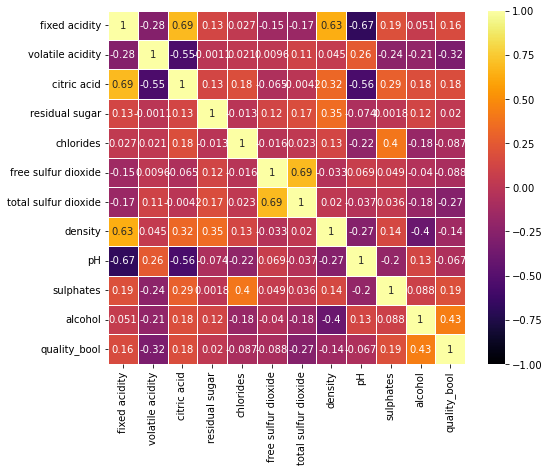

In [3]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno',annot=True)

# fixed acidity	   volatile acidity	    citric acid		total sulfur dioxide	
# density	sulphates	alcohol

- ` First Test Heatmap`

<AxesSubplot:>

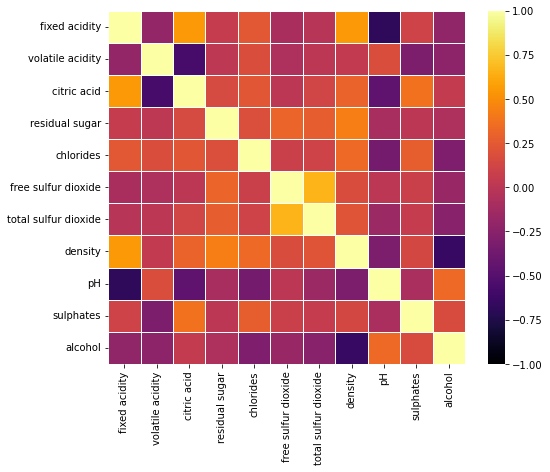

In [4]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(test.drop(columns=['Unnamed: 0']).corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno')

In [5]:
train = train.drop(columns=['pH','free sulfur dioxide',
                            'chlorides','residual sugar','density','citric acid'])
test = test.drop(columns=['pH','free sulfur dioxide',
                            'chlorides','residual sugar','density','citric acid'])

# 'density' 'citric acid',

# Let's also try removing `fixed acidity` since it's weird

train = train.drop(columns=['fixed acidity'])
test = test.drop(columns=['fixed acidity'])


- `Train Heatmap`

<AxesSubplot:>

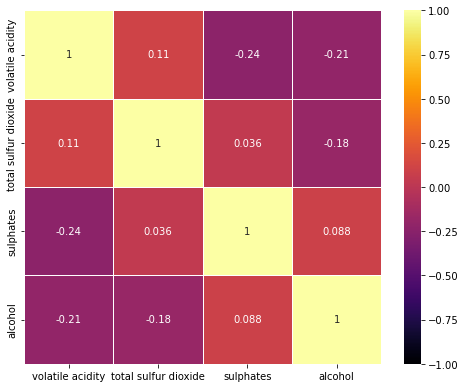

In [6]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.drop(columns=['quality_bool']).corr(method='pearson'), # .drop(columns=['quality_bool'])
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno', annot=True)

- `Test Heatmap`

<AxesSubplot:>

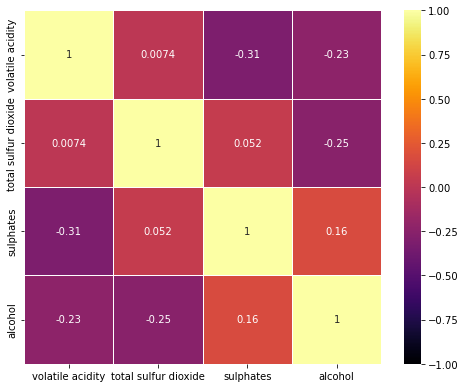

In [7]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(test.drop(columns=['Unnamed: 0']).corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno', annot=True)

In [14]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_bool'],
      dtype='object')

In [239]:
train.describe()

,volatile acidity,total sulfur dioxide,sulphates,alcohol,quality_bool
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.522468,47.457273,0.666073,10.312091,0.520000
std,0.179265,34.355829,0.179362,1.060169,0.499827
min,0.120000,6.000000,0.330000,8.400000,0.000000
25%,0.390000,22.000000,0.560000,9.500000,0.000000
50%,0.510000,38.000000,0.620000,10.000000,1.000000
75%,0.630000,63.000000,0.732500,11.000000,1.000000
max,1.330000,289.000000,2.000000,14.900000,1.000000


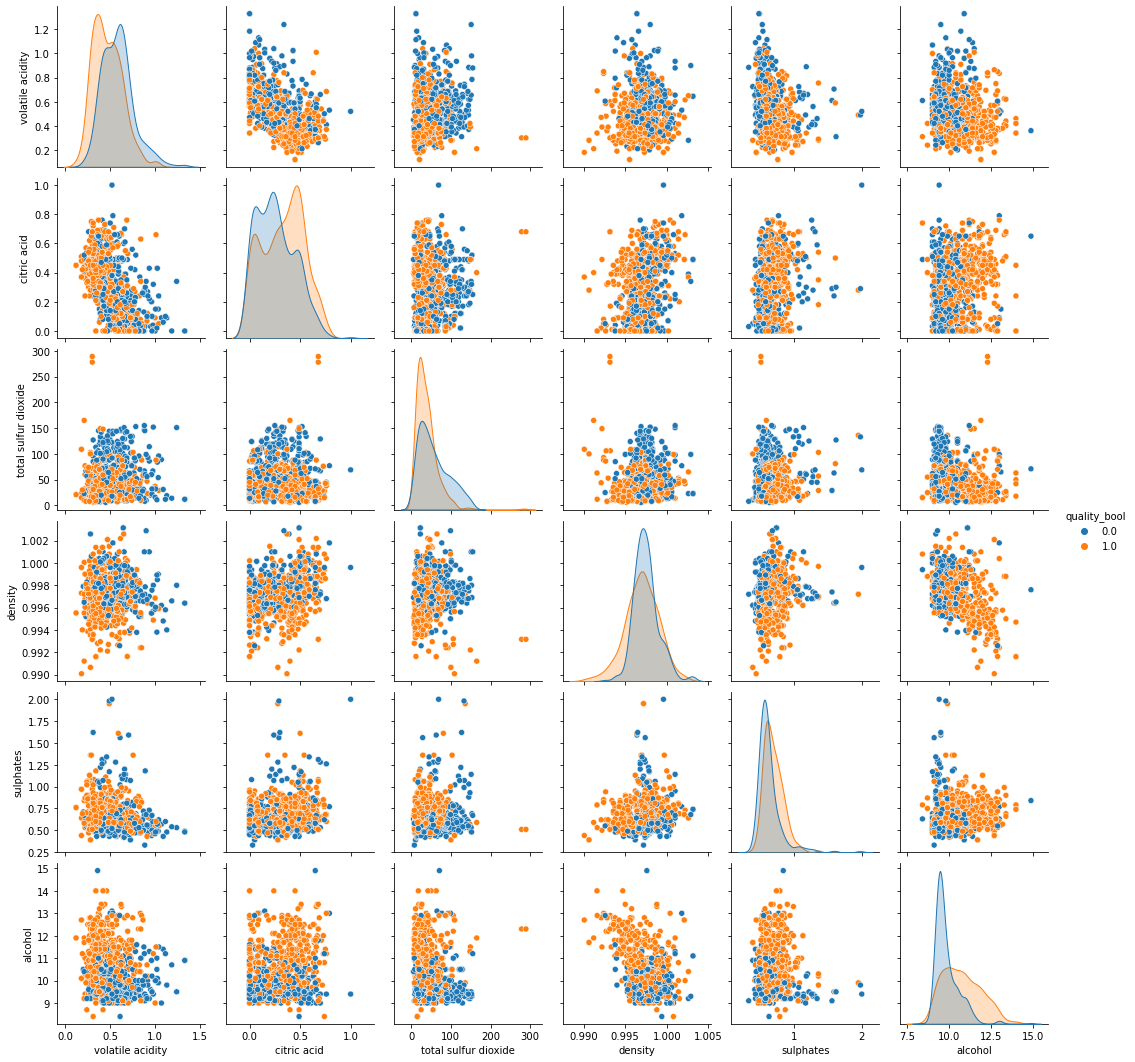

In [194]:
pairplot = sns.pairplot(train, hue='quality_bool')
plt.show()

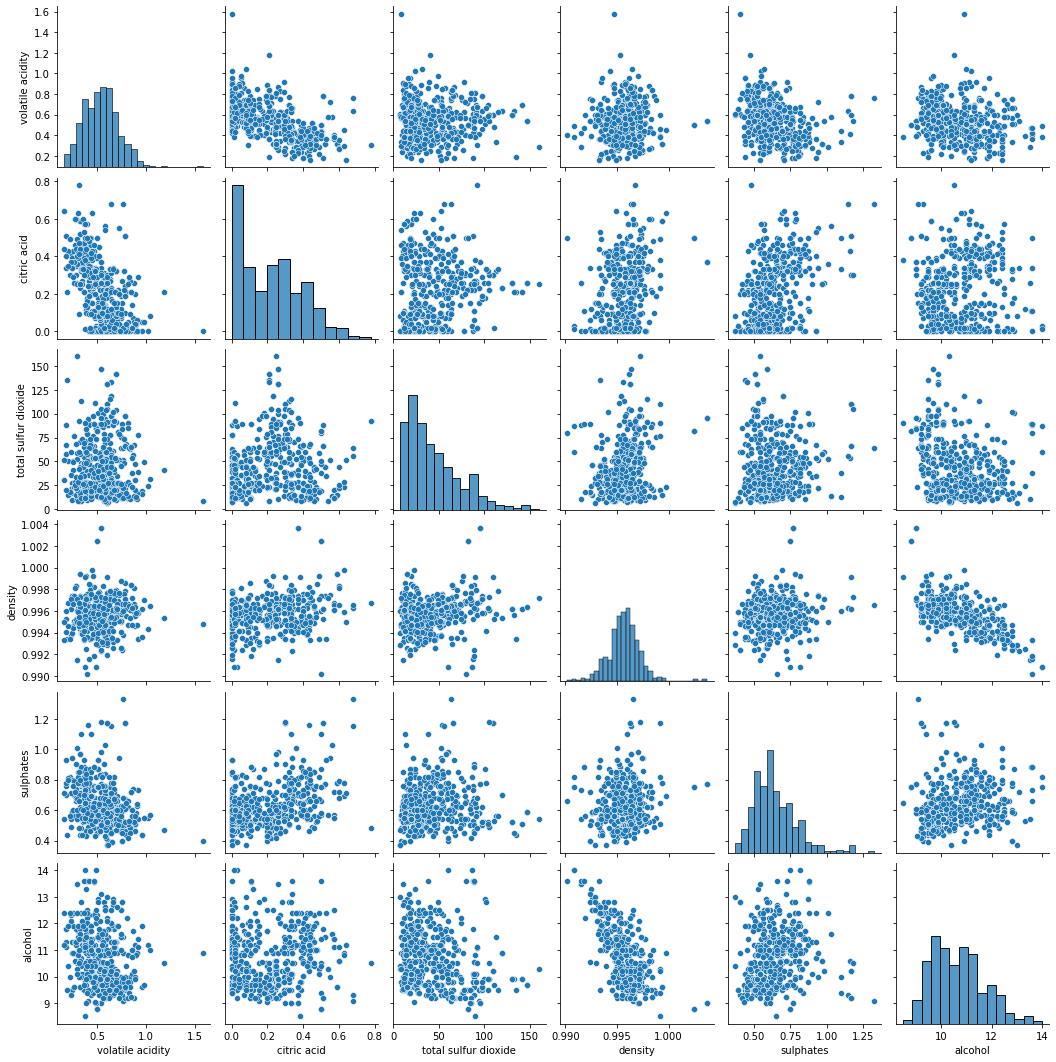

In [195]:
pairplot = sns.pairplot(test.drop(columns=['Unnamed: 0']))
plt.show()

In [196]:
train.describe()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality_bool
count,1100.000000,1100.000000,1100.000000,880.000000,1100.000000,1100.000000,1100.000000
mean,0.522468,0.296609,47.457273,0.997218,0.666073,10.312091,0.520000
std,0.179265,0.199428,34.355829,0.001809,0.179362,1.060169,0.499827
min,0.120000,0.000000,6.000000,0.990070,0.330000,8.400000,0.000000
25%,0.390000,0.120000,22.000000,0.996200,0.560000,9.500000,0.000000
50%,0.510000,0.290000,38.000000,0.997200,0.620000,10.000000,1.000000
75%,0.630000,0.470000,63.000000,0.998200,0.732500,11.000000,1.000000
max,1.330000,1.000000,289.000000,1.003150,2.000000,14.900000,1.000000


In [428]:
print(len(train['sulphates'][train['sulphates']>1]))
index = train['sulphates'][train['sulphates']>1].index
train.loc[index,'sulphates'] = 1

index = test['sulphates'][test['sulphates']>1].index
test.loc[index,'sulphates'] = 1


46


In [429]:
print(len(train['total sulfur dioxide'][train['total sulfur dioxide']>100]))
index = train['total sulfur dioxide'][train['total sulfur dioxide']>100].index
train.loc[index,'total sulfur dioxide'] = 100

index = test['total sulfur dioxide'][test['total sulfur dioxide']>100].index
test.loc[index,'total sulfur dioxide'] = 100

103


In [430]:
print(len(train['volatile acidity'][train['volatile acidity']>1]))
index = train['volatile acidity'][train['volatile acidity']>1].index
train.loc[index,'volatile acidity'] = 1

index = test['volatile acidity'][test['volatile acidity']>1].index
test.loc[index,'volatile acidity'] = 1

17


In [487]:
train['density'].fillna(train['density'].mean(),inplace=True)
test['density'].fillna(test['density'].mean(),inplace=True)

In [488]:
train.isna().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      220
sulphates                 0
alcohol                   0
quality_bool              0
dtype: int64

In [489]:
train['pH'].fillna(train['pH'].mean(),inplace=True)
test['pH'].fillna(test['pH'].mean(),inplace=True)

# Models

In [276]:
X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

### LogisticRegression()

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)


 Acurácia:  0.75


<AxesSubplot:>

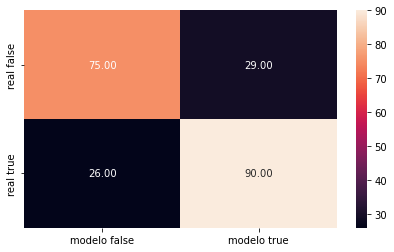

In [435]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

print("\n Acurácia: ", accuracy_score(y_pred, y_test))
sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

In [205]:
logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'fit_intercept' : [True, False],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [7500, 10000]
    }
]

clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=False, n_jobs=-1, 
                    scoring='accuracy')

best_clf = clf.fit(X,y)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

In [113]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",best_clf.best_estimator_)
print("\n The best score across ALL searched params:\n",best_clf.best_score_)
print("\n The best parameters across ALL searched params:\n",best_clf.best_params_)

 Results from Grid Search 


NameError: name 'best_clf' is not defined

In [210]:
logModel = LogisticRegression(C=29.763514416313132, fit_intercept=False, max_iter=7500,
                   solver='sag')

logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75       120
         1.0       0.70      0.71      0.71       100

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220




 Acurácia:  0.7318181818181818


<AxesSubplot:>

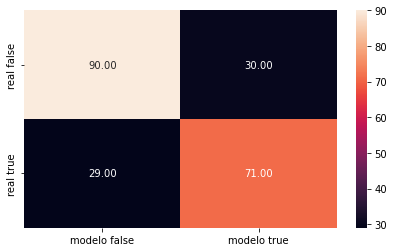

In [211]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

print("\n Acurácia: ", accuracy_score(y_pred, y_test))
sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

In [212]:
MLPModel = MLPClassifier(max_iter=1000) #max_iter=500

parameter_space = {
    'hidden_layer_sizes': [(10,20,10), (30,30,30), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'tol': [1e-5], 
    'alpha': [0.0001, 0.05, 0.1, 0.005, 0.5],
    'learning_rate': ['constant','adaptive','invscaling']
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, test_size=0.2)

mlp_tunned = RandomizedSearchCV(MLPModel, parameter_space, n_iter=500, 
                                n_jobs=-1, cv=3, scoring='accuracy') 

#talvez mudar o scoring do GSCV para uma lista com outras métricas tbm

mlp_tunned.fit(X_train,y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",mlp_tunned.best_estimator_)
print("\n The best score across ALL searched params:\n",mlp_tunned.best_score_)
print("\n The best parameters across ALL searched params:\n",mlp_tunned.best_params_)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

 Results from Grid Search 

 The best estimator across ALL searched params:
 MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=1000,
              solver='lbfgs', tol=1e-05)

 The best score across ALL searched params:
 0.7602214947412412

 The best parameters across ALL searched params:
 {'tol': 1e-05, 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}


In [213]:
# mlp_tunned =  MLPClassifier(activation='tanh', alpha=0.5, hidden_layer_sizes=(50, 50, 50),
#               learning_rate='adaptive', max_iter=1000, solver='lbfgs',
#               tol=1e-05)

mlp_tunned.fit(X_train,y_train)

y_pred = mlp_tunned.predict(X_test)

print("\n Acurácia: ", accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 


 Acurácia:  0.740909090909091
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       120
         1.0       0.72      0.70      0.71       100

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220



<AxesSubplot:>

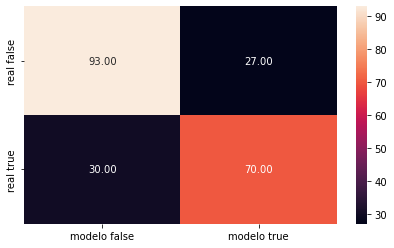

In [214]:
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize = (7,4)) 

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

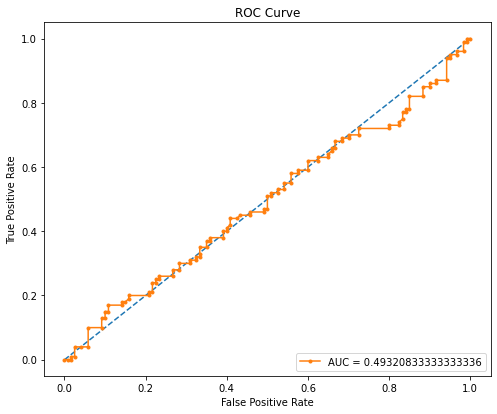

In [215]:
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_prob[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred_prob[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

### RandomForestRegression()

In [436]:
X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

param_grid = {
    'n_estimators' : list(range(10,300,3)),
    'max_features' : [0,1,2,3,4,5,'log2','None','sqrt'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    }

# Create grid search object

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, verbose=True, n_jobs=-1, scoring='accuracy') 
clf.fit(X_train, y_train)

Fitting 3 folds for each of 2619 candidates, totalling 7857 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0, 1, 2, 3, 4, 5, 'log2', 'None',
                                          'sqrt'],
                         'n_estimators': [10, 13, 16, 19, 22, 25, 28, 31, 34,
                                          37, 40, 43, 46, 49, 52, 55, 58, 61,
                                          64, 67, 70, 73, 76, 79, 82, 85, 88,
                                          91, 94, 97, ...]},
             scoring='accuracy', verbose=True)

In [437]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='log_loss', max_features=1, n_estimators=46)

 The best score across ALL searched params:
 0.8079604993305627

 The best parameters across ALL searched params:
 {'criterion': 'log_loss', 'max_features': 1, 'n_estimators': 46}


In [443]:
clf = RandomForestClassifier(criterion='log_loss', max_features=1, n_estimators=46)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       104
         1.0       0.85      0.84      0.84       116

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220


 Acurácia:  0.8363636363636363


<AxesSubplot:>

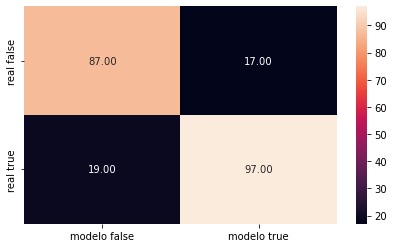

In [444]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

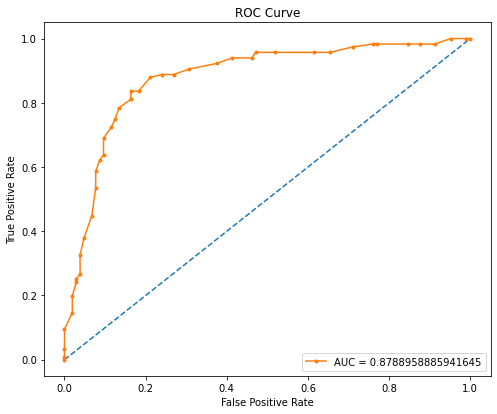

In [445]:
y_pred_prob = clf.predict_proba(X_test)
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_prob[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred_prob[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

# SVC

In [306]:
from sklearn.svm import SVC

X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

params = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0, 100.0],
    'kernel': ['rbf', 'sigmoid', 'linear'],
    'gamma' : ['scale', 'auto'],
    'degree' : [1,2,3,5,7]
}

gs = GridSearchCV(SVC(), params, cv = 3, verbose=2, scoring='accuracy')
gs.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ........C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=au

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0, 100.0],
                         'degree': [1, 2, 3, 5, 7], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=2)

In [307]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
print("\n The best score across ALL searched params:\n",gs.best_score_)
print("\n The best parameters across ALL searched params:\n",gs.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=100.0, degree=1, kernel='linear')

 The best score across ALL searched params:
 0.7443368701291666

 The best parameters across ALL searched params:
 {'C': 100.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [309]:
# X = train.drop(columns=['quality_bool'])
# y = train['quality_bool']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.42      0.53       104
         1.0       0.62      0.85      0.72       116

    accuracy                           0.65       220
   macro avg       0.67      0.64      0.63       220
weighted avg       0.67      0.65      0.63       220


 Acurácia:  0.65


<AxesSubplot:>

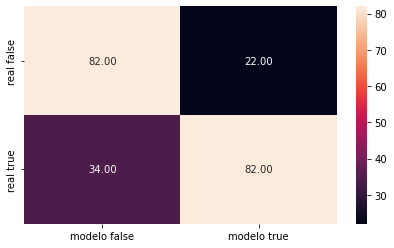

In [110]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# FEATURE SELECTION

In [490]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

full_X = X.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k=8).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [9.86828332e+00 6.34133583e+00 4.10581318e+00 2.50195946e-04
 8.65673638e-02 4.82334229e+01 1.69287257e+03 2.75715313e-05
 2.51725711e-02 1.92700918e+00 1.55472619e+01]
Columns:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [451]:
ft = SelectKBest(f_classif, k= 8).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [2.68486248e+01 1.14494827e+02 3.20843920e+01 3.59646794e-04
 3.24513484e+00 7.10562305e+00 8.18062902e+01 1.08540269e+01
 4.40614443e+00 8.11551921e+01 1.80567319e+02]
Columns:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [452]:
cols = ft.get_support(indices=True)
new_features_df = train.iloc[:,cols]
new_features_df

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1095,9.4,0.400,0.47,6.0,20.0,0.99772,0.50,10.5
1096,6.6,0.725,0.09,9.0,17.0,0.99655,0.49,10.8
1097,8.6,0.520,0.38,5.0,18.0,0.99666,0.52,9.4
1098,8.0,0.310,0.45,5.0,16.0,0.99358,0.81,12.5


In [453]:
X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

full_X = X.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [454]:
X_train = ft.transform(X_train)
X_test = ft.transform(X_test) 

full_X = ft.transform(full_X)
full_test = ft.transform(test.drop(columns=['Unnamed: 0']))

# PREPROCESSING

In [491]:
from sklearn import preprocessing

full_test = test.drop(columns=['Unnamed: 0'])

X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

full_X = preprocessing.StandardScaler().fit(full_X).transform(full_X.astype(float))
full_test = preprocessing.StandardScaler().fit(full_test).transform(full_test.astype(float))

In [405]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

full_X = preprocessing.normalize(full_X)
full_test = preprocessing.normalize(full_test)

# KNN

In [492]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.74090909, 0.69545455, 0.71818182, 0.75      , 0.72272727,
       0.75      , 0.74545455, 0.74545455, 0.71363636, 0.73636364,
       0.74545455, 0.74090909, 0.73636364, 0.73181818, 0.72727273,
       0.75454545, 0.72727273, 0.74545455, 0.73636364, 0.74545455])

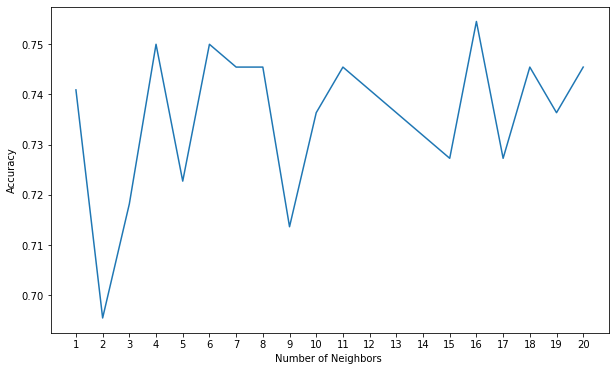

In [493]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [494]:
# grid_params = { 'n_neighbors' : [3,4,5,7,9,11,13,15],
#                'weights' : ['uniform','distance'],
#                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                'p' : [1,2],
#                'metric' : ['minkowski','euclidean','manhattan']}

grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,18,20,25,30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1,scoring='accuracy')
knn.fit(X_train, y_train)

Fitting 3 folds for each of 66 candidates, totalling 198 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18, 20, 25,
                                         30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [495]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",knn.best_estimator_)
print("\n The best score across ALL searched params:\n",knn.best_score_)
print("\n The best parameters across ALL searched params:\n",knn.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

 The best score across ALL searched params:
 0.7795693931725136

 The best parameters across ALL searched params:
 {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}


In [514]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       104
         1.0       0.81      0.80      0.81       116

    accuracy                           0.80       220
   macro avg       0.79      0.80      0.79       220
weighted avg       0.80      0.80      0.80       220


 Acurácia:  0.7954545454545454


<AxesSubplot:>

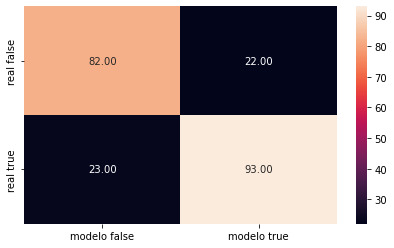

In [515]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# LOGISTIC REGRESSION

In [522]:
logModel = LogisticRegression(max_iter=1000)

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-40, 40, 10),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]

lreg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=False, n_jobs=-1, 
                    scoring='accuracy')

lreg.fit(X_train,y_train)

/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search f

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-40, 7.74263683e-32, 5.99484250e-23, 4.64158883e-14,
       3.59381366e-05, 2.78255940e+04, 2.15443469e+13, 1.66810054e+22,
       1.29154967e+31, 1.00000000e+40]),
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy', verbose=False)

In [523]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",lreg.best_estimator_)
print("\n The best score across ALL searched params:\n",lreg.best_score_)
print("\n The best parameters across ALL searched params:\n",lreg.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=1e-40, max_iter=1000, penalty='none')

 The best score across ALL searched params:
 0.742077035592394

 The best parameters across ALL searched params:
 {'C': 1e-40, 'penalty': 'none', 'solver': 'lbfgs'}


In [518]:
lreg = LogisticRegression()

lreg.fit(X_train,y_train)

y_pred = lreg.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       104
         1.0       0.77      0.74      0.75       116

    accuracy                           0.75       220
   macro avg       0.75      0.75      0.75       220
weighted avg       0.75      0.75      0.75       220


 Acurácia:  0.7454545454545455


<AxesSubplot:>

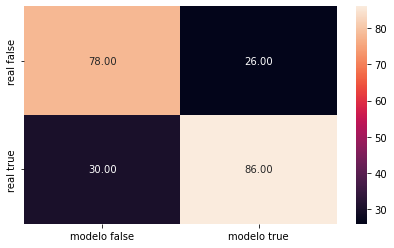

In [519]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# RANDOM FOREST

In [545]:
param_grid = {
    'n_estimators' : list(range(7,151,1)),
    'max_features' : [0,1,2,3,4,5,'log2','None','sqrt'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    }

# Create grid search object

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy') 
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0, 1, 2, 3, 4, 5, 'log2', 'None',
                                          'sqrt'],
                         'n_estimators': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                          17, 18, 19, 20, 21, 22, 23, 24, 25,
                                          26, 27, 28, 29, 30, 31, 32, 33, 34,
                                          35, 36, ...]},
             scoring='accuracy', verbose=True)

In [546]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_features=2, n_estimators=128)

 The best score across ALL searched params:
 0.8147727272727273

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_features': 2, 'n_estimators': 128}


In [547]:
clf = RandomForestClassifier(criterion='entropy', max_features=2, n_estimators=128) #fs1

# clf = RandomForestClassifier(criterion='entropy', max_features=2, n_estimators=161) fs2

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       104
         1.0       0.82      0.77      0.79       116

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220


 Acurácia:  0.7863636363636364


<AxesSubplot:>

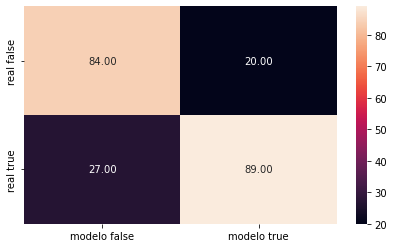

In [548]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# MLP CLASSIFIER

In [389]:
MLPModel = MLPClassifier(max_iter=500) #max_iter=500

parameter_space = {
    #'hidden_layer_sizes': [(10,20,10), (30,30,30), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.005, 0.05, 0.1, 0.005, 0.5, 1, 5, 10, 100 ],
    'learning_rate': ['constant','adaptive','invscaling']
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, test_size=0.2)

mlp_tunned = RandomizedSearchCV(MLPModel, parameter_space, n_iter=1500, 
                                n_jobs=-1, cv=3, scoring='accuracy') 

#talvez mudar o scoring do GSCV para uma lista com outras métricas tbm

mlp_tunned.fit(X_train,y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",mlp_tunned.best_estimator_)
print("\n The best score across ALL searched params:\n",mlp_tunned.best_score_)
print("\n The best parameters across ALL searched params:\n",mlp_tunned.best_params_)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Con

 Results from Grid Search 

 The best estimator across ALL searched params:
 MLPClassifier(activation='logistic', learning_rate='invscaling', max_iter=500,
              solver='lbfgs')

 The best score across ALL searched params:
 0.761374629487745

 The best parameters across ALL searched params:
 {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'alpha': 0.0001, 'activation': 'logistic'}


In [393]:
mlp_tunned = MLPClassifier(activation='logistic', alpha=0.05, learning_rate='adaptive',
              max_iter=5000)

mlp_tunned.fit(X_train,y_train)

y_pred = mlp_tunned.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       120
         1.0       0.71      0.73      0.72       100

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220


 Acurácia:  0.740909090909091


<AxesSubplot:>

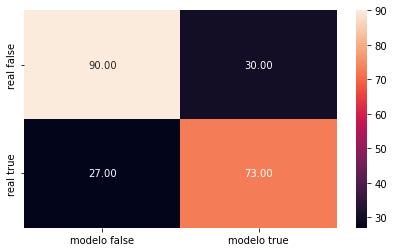

In [394]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# PREDICT

In [480]:
clf.fit(full_X,y)

RandomForestClassifier(max_features=1, n_estimators=21)

In [549]:
y_pred = clf.predict(full_test)

sub_df = pd.DataFrame(y_pred, columns = ['quality_bool'], index = test['Unnamed: 0'], dtype=int)
sub_df.index.name = 'id'
sub_df.value_counts()

quality_bool
1               278
0               221
dtype: int64

In [550]:
sub_df

,quality_bool
id,
1100,1
1101,1
1102,0
1103,1
1104,1
...,...
1594,1
1595,1
1596,1


In [551]:
sub_df.to_csv('Submissions/sub_df_12.csv',index='id')